Let's perform EDA on HR_Employee_Attrition_Data.
Employee attrition analytics is specifically focused on identifying why employees voluntarily leave, what might have prevented them from leaving, and how we can use data to predict attrition risk.

In [27]:
#Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [28]:
df=pd.read_csv("HR_Employee_Attrition_Data.csv")

In [29]:
# Set to view all the columns of the dataset

pd.set_option('display.max_columns', 100)


df.head(100)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,1,Female,60,3,3,Research Director,3,Married,13549,24001,9,Y,No,12,3,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,1,Female,33,3,2,Sales Executive,3,Married,4999,17519,0,Y,No,21,4,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,2,Male,43,3,2,Sales Executive,3,Married,4221,8863,1,Y,No,15,3,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8


The data contains columns that do not provide useful information. Therefore, it is recommended to proceed with dropping the columns "EmployeeCount," "EmployeeNumber," and "Over18. We will  proceed drop process with preprocessing the data further.

Text(0.5, 1.0, 'Distribution of Joblevel')

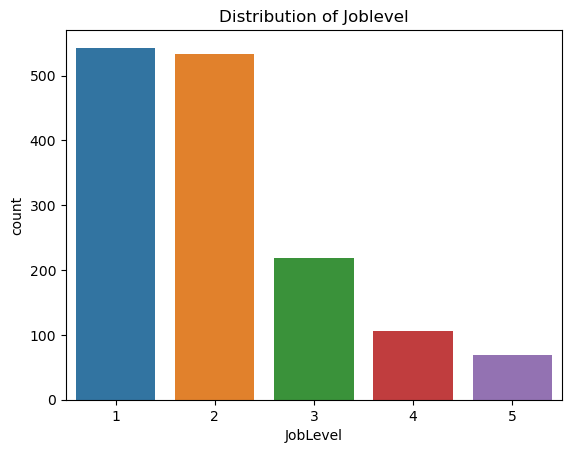

In [30]:
sns.countplot(df["JobLevel"])
plt.title("Distribution of Joblevel")

Based on the information provided, it appears that the "JobLevel" variable in the data indicates five different levels: Junior, Entry Level, Mid-level, Senior, and Executive. 
The distribution of job levels is proportionally larger at the junior and entry levels. This indicates a higher concentration of employees in these positions

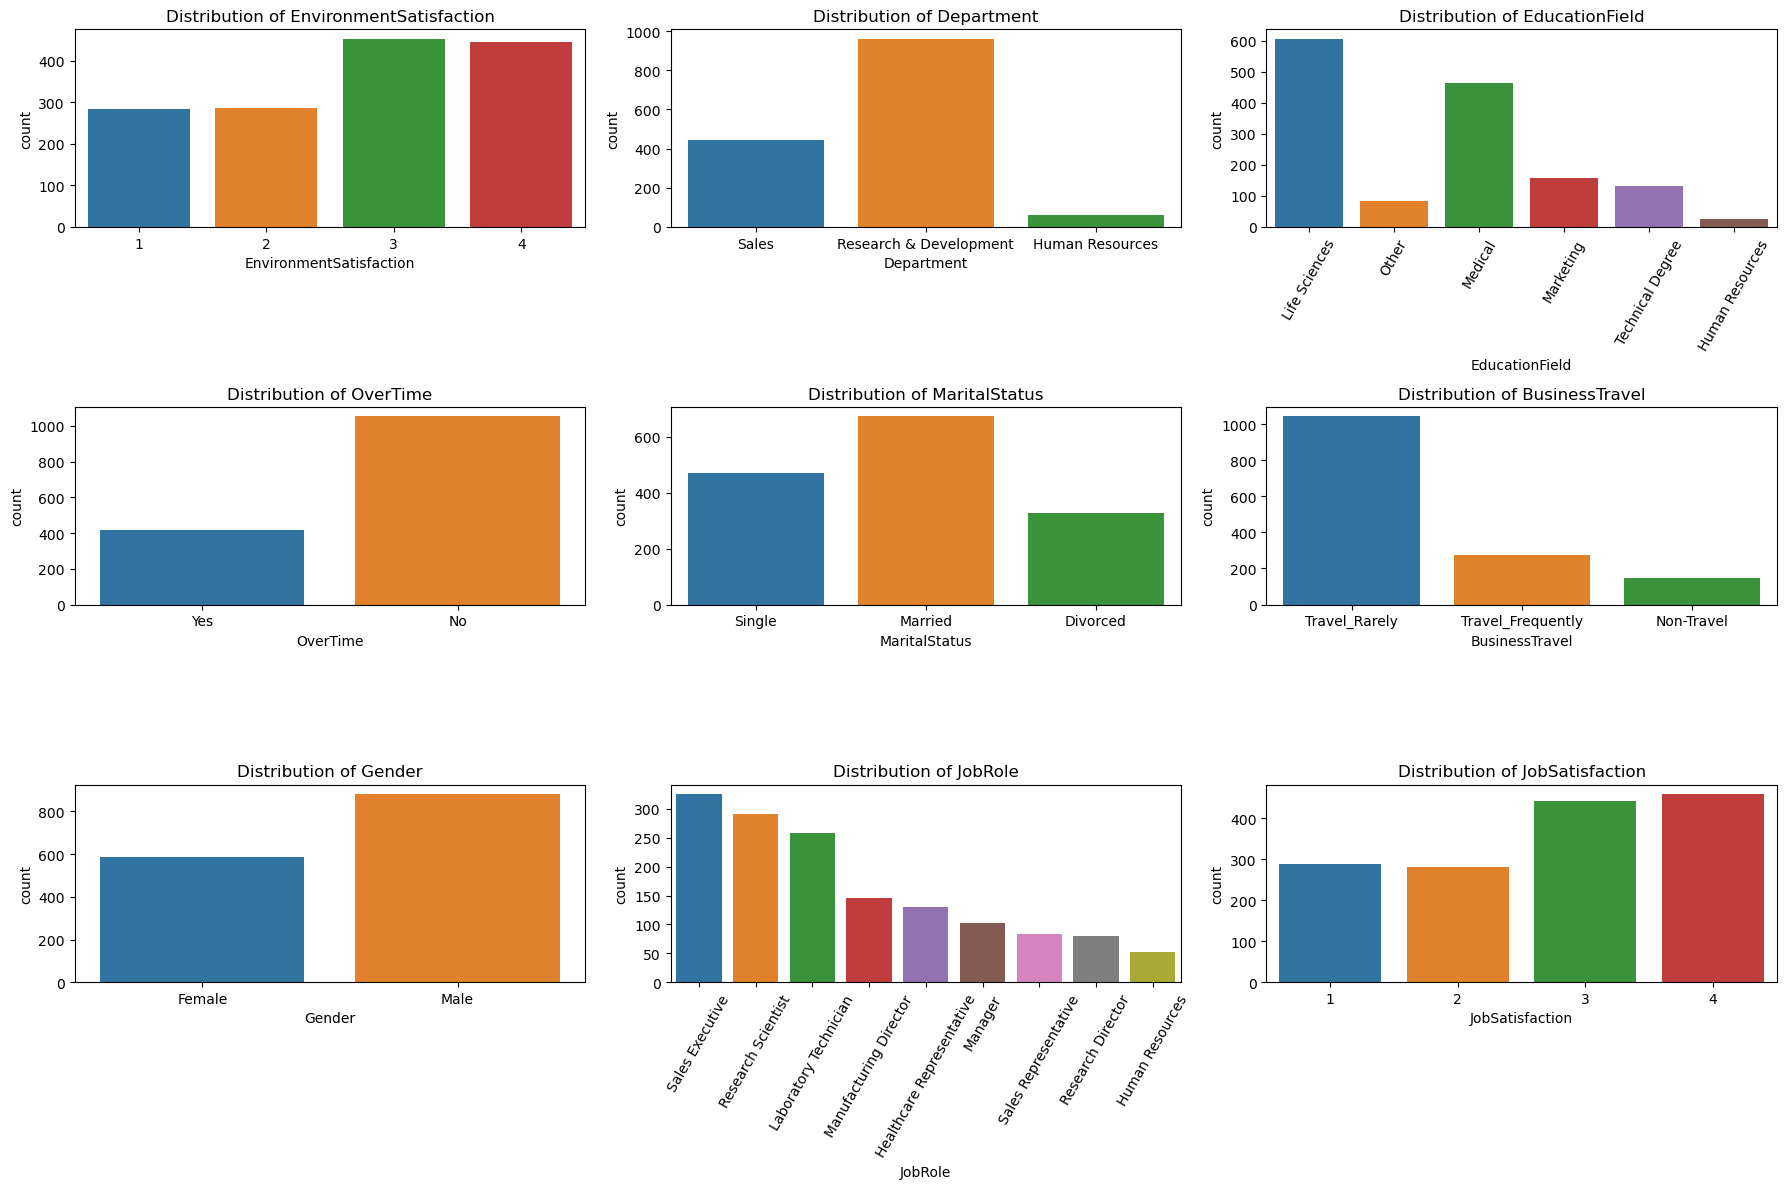

In [31]:
plt.subplots(3,3,figsize=(18,12))

plt.subplot(3,3,1)
sns.countplot(x="EnvironmentSatisfaction", data=df)
plt.title("Distribution of EnvironmentSatisfaction")

plt.subplot(3,3,2)
sns.countplot(x="Department", data=df)
plt.title("Distribution of Department")

plt.subplot(3,3,3)
sns.countplot(x="EducationField", data=df)
plt.xticks(rotation=60)
plt.title("Distribution of EducationField")

plt.subplot(3,3,4)
sns.countplot(x="OverTime", data=df)
plt.title("Distribution of OverTime")

plt.subplot(3,3,5)
sns.countplot(x="MaritalStatus", data=df)
plt.title("Distribution of MaritalStatus")

plt.subplot(3,3,6)
sns.countplot(x="TotalWorkingYears", data=df)
plt.title("Distribution of TotalWorkingYears")

plt.subplot(3,3,6)
sns.countplot(x="BusinessTravel", data=df)
plt.title("Distribution of BusinessTravel")

plt.subplot(3,3,7)
sns.countplot(x="Gender", data=df)
plt.title("Distribution of Gender")

plt.subplot(3,3,8)
sns.countplot(x="JobRole", data=df)
plt.xticks(rotation=60)
plt.title("Distribution of JobRole")

plt.subplot(3,3,9)
sns.countplot(x="JobSatisfaction", data=df)
plt.title("Distribution of JobSatisfaction")

plt.tight_layout()

When exploring categorical data, we can observe a higher distribution of employees in the Research & Development department, with a predominant educational background in medical and life sciences. Moreover, there is a higher proportion of married individuals in terms of marital status. In terms of job roles, the data shows top positions distribution with sales executives, research scientists, and laboratory technicians.

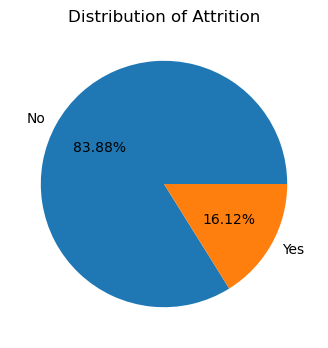

In [32]:
plt.figure(figsize=(5,4))
plt.pie(x=df["Attrition"].value_counts(), labels=df["Attrition"].value_counts().index, autopct='%0.2f%%',data=df )
plt.title('Distribution of Attrition')
plt.show()

The observed distribution of attrition, with approximately 16.12% of employees leaving the company, indicates a relatively high attrition rate.  

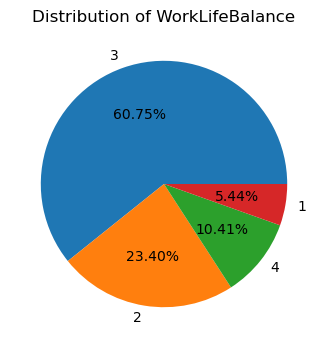

In [33]:
plt.figure(figsize=(5,4))
plt.pie(x=df["WorkLifeBalance"].value_counts(), labels=df["WorkLifeBalance"].value_counts().index, autopct='%0.2f%%',data=df )
plt.title('Distribution of WorkLifeBalance')
plt.show()

According to the data, it appears that a significant proportion of employees have work-life balance level 3, approximately 60.75% . Additionally, around 23.40% of employees fall into work-life balance level 2.

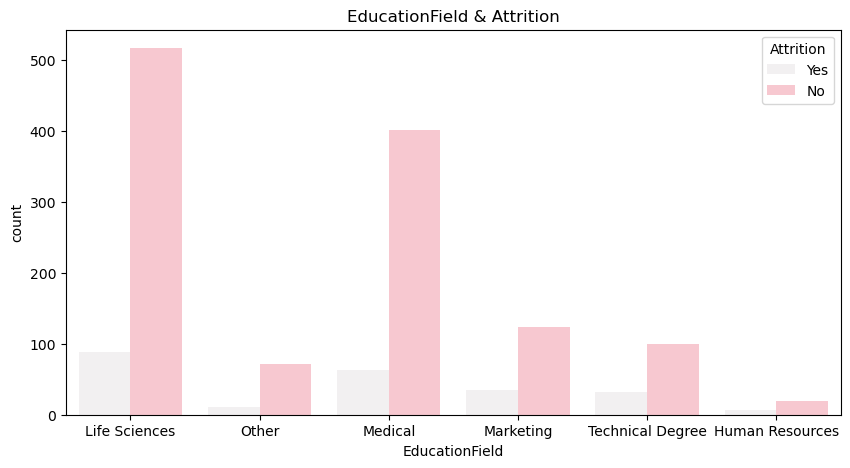

In [34]:
plt.figure(figsize=(10,5))
plt.title("EducationField & Attrition")
sns.countplot(x="EducationField",data = df, hue="Attrition", color="pink")
plt.show()

Based on our previous observations, it appears that the company has a higher percentage of employees with a background in the fields of Life Science and Medical. This indicates that there is a significant presence of individuals with expertise in these areas within the company and higher rate attrition of this individuals. 

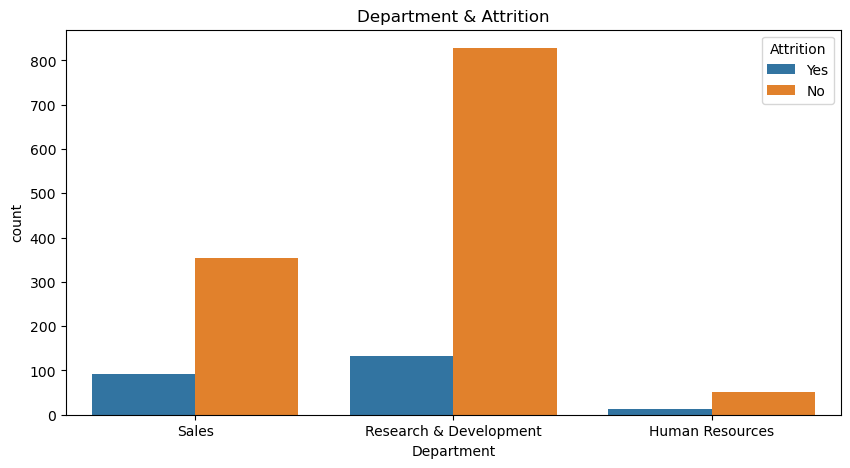

In [35]:
plt.figure(figsize=(10,5))
plt.title("Department & Attrition")
sns.countplot(x = "Department", data = df, hue="Attrition")
plt.show()

In [36]:
sns.set_palette("pastel")

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

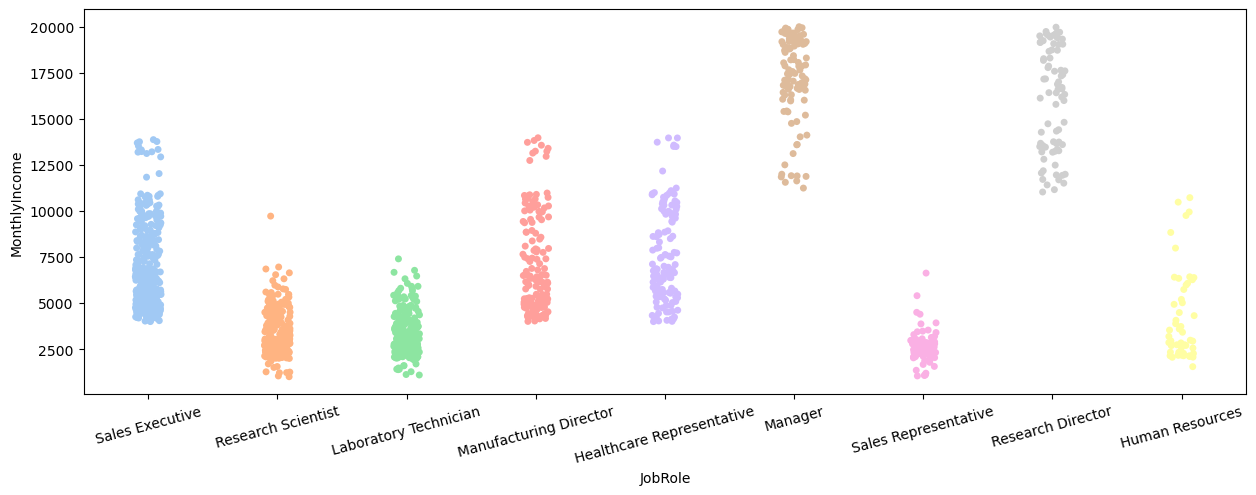

In [37]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=15)
sns.stripplot(x="JobRole", y="MonthlyIncome", data=df)

The research scientist, laboratory technician, sales representative, and human resources positions have the lowest salaries. This factor may contribute to the observed attrition rate

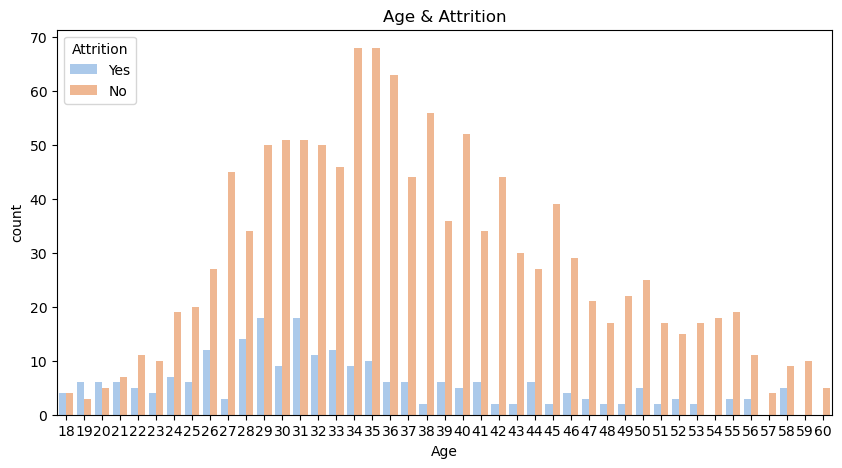

In [38]:
plt.figure(figsize=(10,5))
plt.title("Age & Attrition")
sns.countplot(x = "Age", data = df, hue="Attrition")
plt.show()

<AxesSubplot:xlabel='Age', ylabel='JobSatisfaction'>

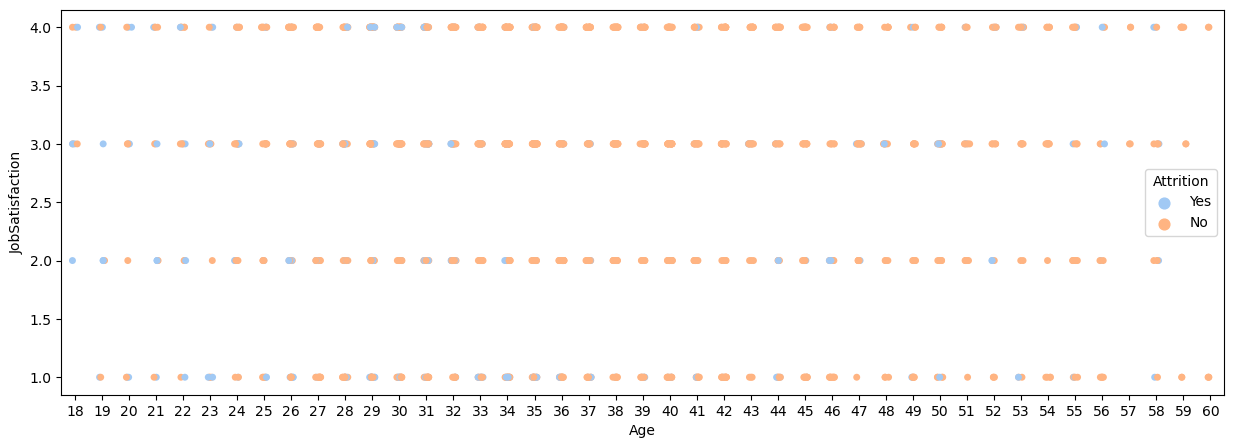

In [39]:
plt.figure(figsize=(15,5))

sns.stripplot(x="Age", y="JobSatisfaction", hue="Attrition", data=df)

We observed a higher attrition rate among employees aged 18-26. Additionally, there is a notable trend of employees leaving the company between the ages of 28 and 31 particularly those with a job satisfaction rating of 4.

In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


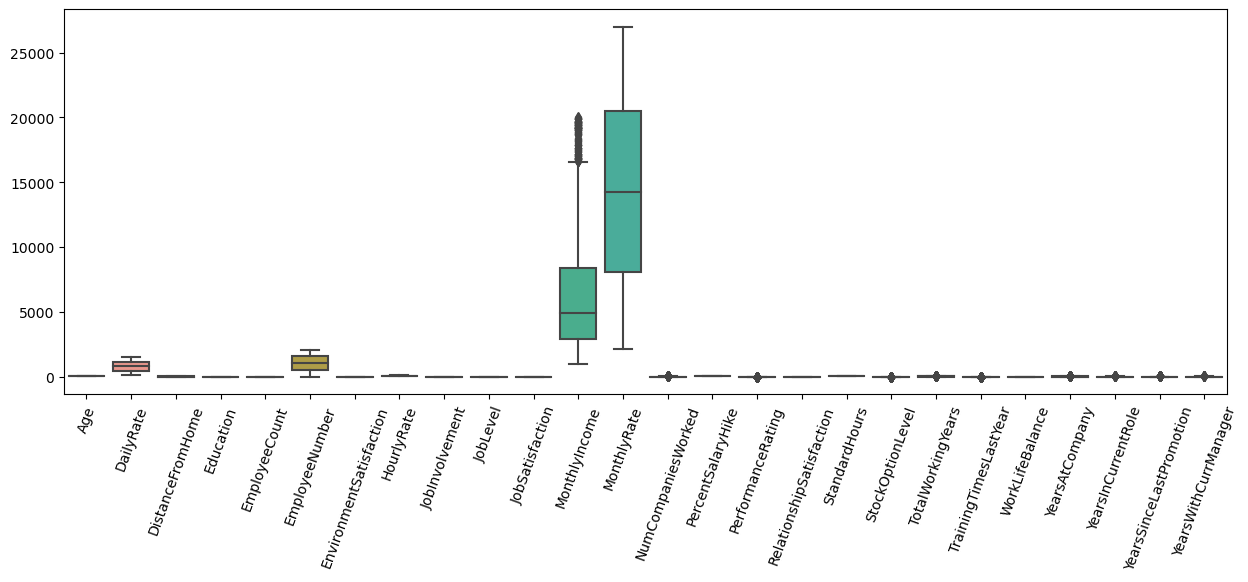

In [41]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=70)
sns.boxplot(data=df)
plt.show()

In [ ]:
plt.hist(df['MonthlyIncome'], bins=30, edgecolor='black')

# Set the title and labels
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

We can observe that the distribution of the monthly income data is skewed to the right, indicating that the majority of values are concentrated towards the lower end.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

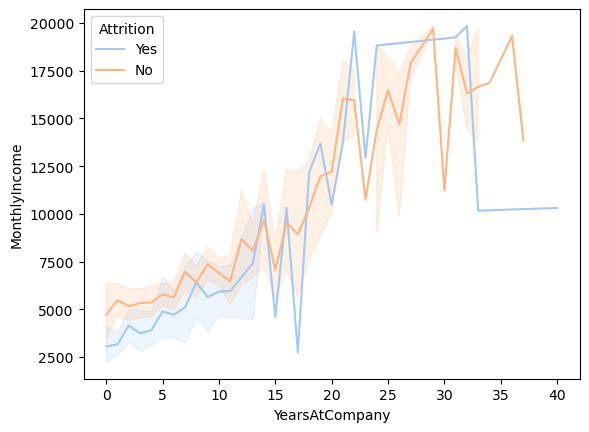

In [43]:
sns.lineplot(x=df['YearsAtCompany'],y=df['MonthlyIncome'],hue='Attrition', data=df)

It appears that as the number of years in the company increases, the salary also tends to increase. This suggests a positive correlation between years in the company and salary. Alse seems salary decreased on the point over 35 year at the company, could be due to factors such as retirement age or decreased productivity.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='RelationshipSatisfaction'>

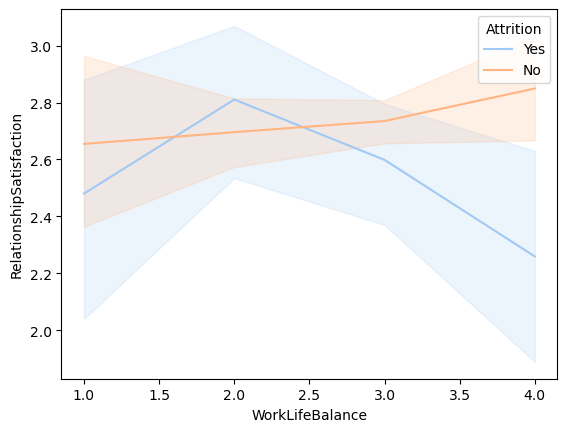

In [44]:
sns.lineplot(x=df['WorkLifeBalance'],y=df['RelationshipSatisfaction'],hue="Attrition",data=df)

People who have higher relationship satisfaction and better work-life balance are more likely to stay with the company.
If relationship satisfaction decreases, it may have an impact on work-life balance. Lower relationship satisfaction can lead to increased stress and conflicts in personal life, which can negatively affect work-life balance.

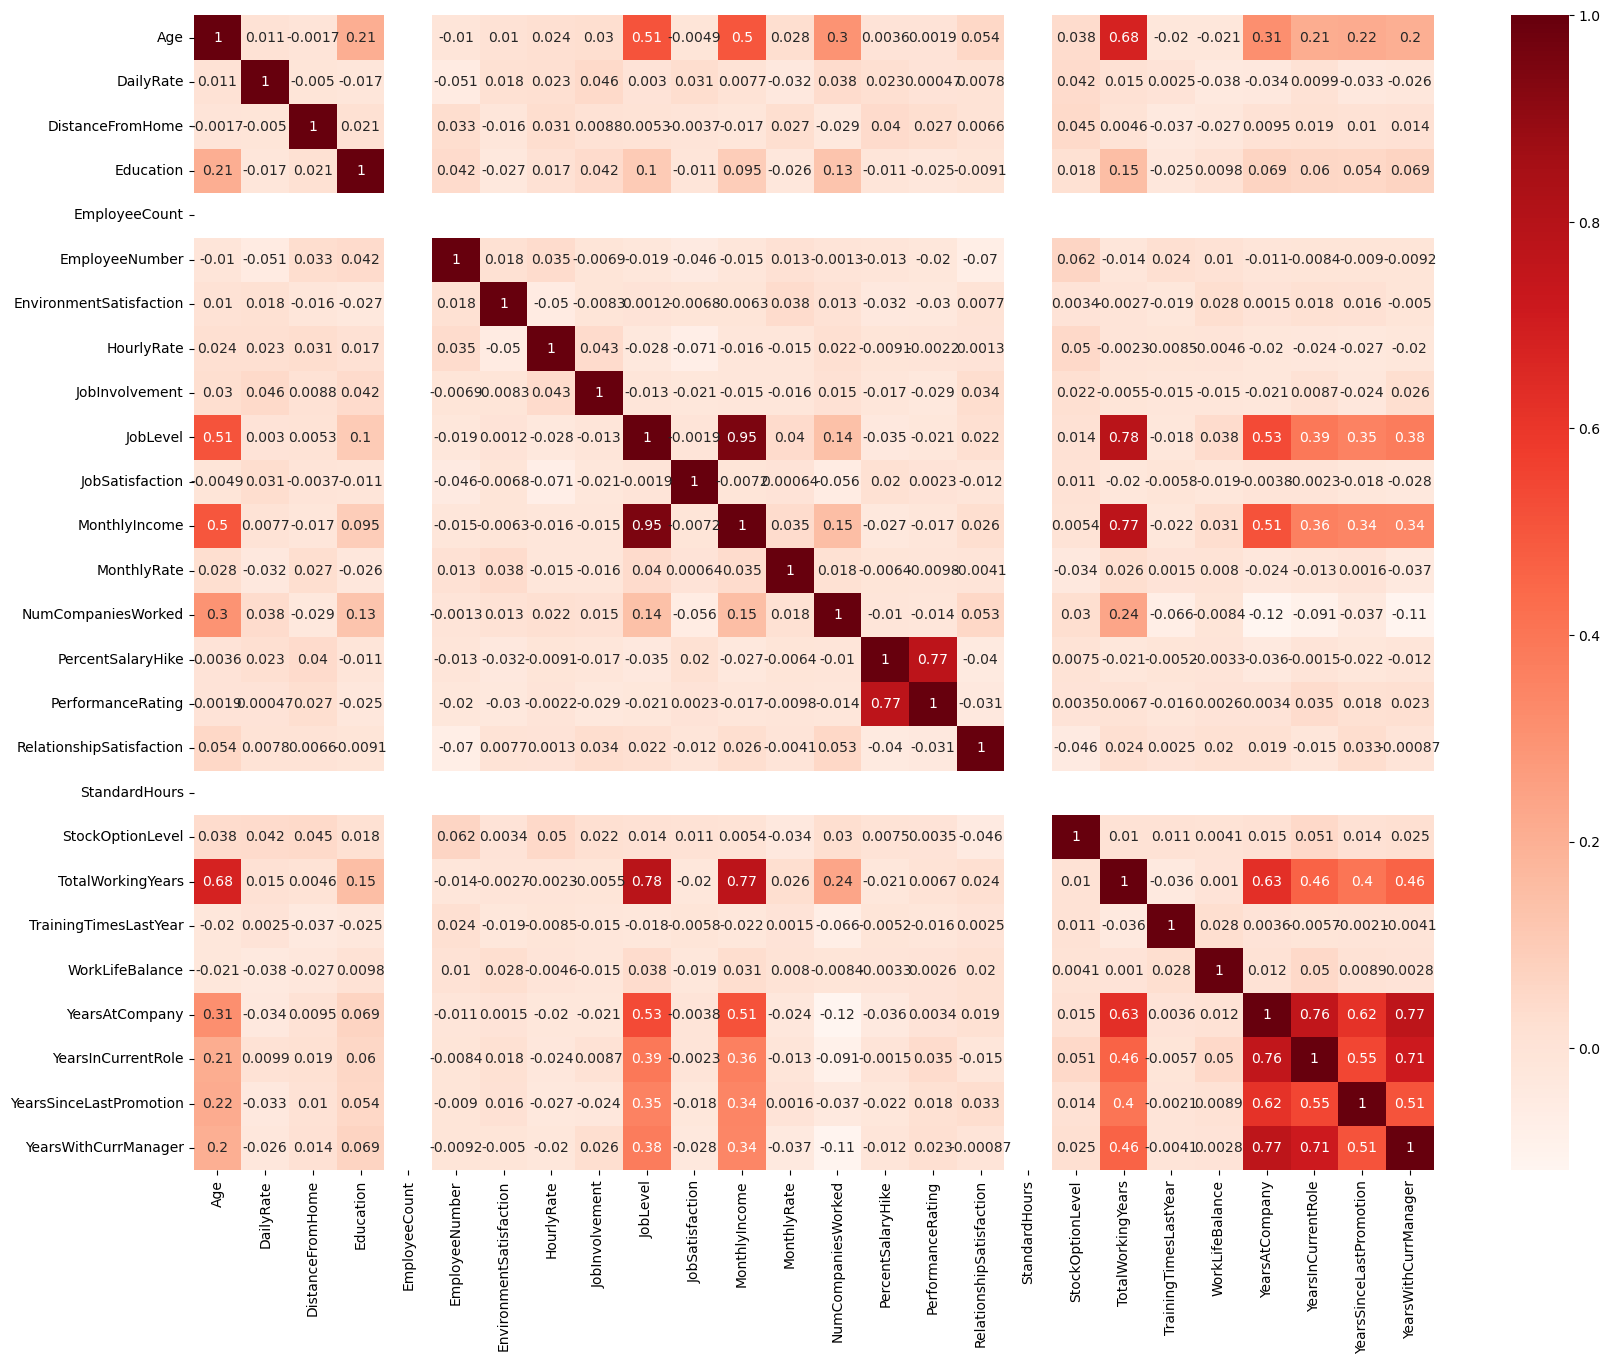

In [45]:
#plot the correlation matrix of salary, balance and age in data dataframe.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap = 'Reds')
plt.show()

It seems that there is a positive correlation between the total number of working years and variables such as age, job level, and monthly income.
This correlation implies that more experienced employees, who have spent a longer time working, generally tend to be older, hold higher job levels, and earn higher monthly incomes.

# Conclusion:

Young employees who have recently joined the company have a higher likelihood of leaving, because they are at an age where they are more open to exploring new opportunities and gaining diverse experiences.
Besides salary, the working environment factor is also an important factor that determines whether employees really stick around for a long time or not.
It is important for organizations to promote positive relationship experiences and support work-life balance among employees. By implementing measures such as fostering a positive work environment, offering flexibility in work arrangements, and providing resources for employee well-being, organizations can help mitigate attrition rates and enhance overall employee satisfaction.
